In [6]:
!pip install kaggle
!pip install streamlit
!pip install nltk

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import nltk 
!kaggle datasets download jrobischon/wikipedia-movie-plots --force --unzip


  0%|          | 0.00/29.9M [00:00<?, ?B/s]
  3%|3         | 1.00M/29.9M [00:00<00:04, 6.11MB/s]
  7%|6         | 2.00M/29.9M [00:00<00:05, 5.79MB/s]
 10%|#         | 3.00M/29.9M [00:00<00:04, 6.09MB/s]
 13%|#3        | 4.00M/29.9M [00:00<00:04, 6.61MB/s]
 17%|#6        | 5.00M/29.9M [00:00<00:03, 6.85MB/s]
 20%|##        | 6.00M/29.9M [00:00<00:03, 7.16MB/s]
 23%|##3       | 7.00M/29.9M [00:01<00:03, 7.52MB/s]
 27%|##6       | 8.00M/29.9M [00:01<00:03, 7.50MB/s]
 30%|###       | 9.00M/29.9M [00:01<00:02, 7.49MB/s]
 33%|###3      | 10.0M/29.9M [00:01<00:02, 7.48MB/s]
 37%|###6      | 11.0M/29.9M [00:01<00:02, 7.73MB/s]
 40%|####      | 12.0M/29.9M [00:01<00:02, 7.65MB/s]
 43%|####3     | 13.0M/29.9M [00:01<00:02, 7.59MB/s]
 47%|####6     | 14.0M/29.9M [00:02<00:02, 7.82MB/s]
 50%|#####     | 15.0M/29.9M [00:02<00:02, 7.70MB/s]
 53%|#####3    | 16.0M/29.9M [00:02<00:01, 7.89MB/s]
 57%|#####6    | 17.0M/29.9M [00:02<00:01, 8.03MB/s]
 60%|######    | 18.0M/29.9M [00:02<00:01, 7.66MB/s]
 

In [8]:
df = pd.read_csv('wiki_movie_plots_deduped.csv')
df.rename(columns = {'Release Year': 'Year'}, inplace = True)
df.rename(columns = {'Origin/Ethnicity': 'Origin'}, inplace = True)
df.insert(8, "Count_", 1)
df.head()

,Year,Title,Origin,Director,Cast,Genre,Wiki Page,Plot,Count_
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",1
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",1
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",1
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,1
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,1


Release Year - Year in which the movie was released
Title - Movie title
Origin/Ethnicity - Origin of movie (i.e. American, Bollywood, Tamil, etc.)
Director - Director(s)
Plot - Main actor and actresses
Genre - Movie Genre(s)
Wiki Page - URL of the Wikipedia page from which the plot description was scraped
Plot - Long form description of movie plot (WARNING: May contain spoilers!!!)


In [9]:
df.isna().sum()

Year            0
Title           0
Origin          0
Director        0
Cast         1422
Genre           0
Wiki Page       0
Plot            0
Count_          0
dtype: int64

In [12]:
df_gr = df.groupby('Year', as_index = False).count()[['Year','Count_']]
df_gr.sort_values(by = ['Count_'], ascending = False)
Year_max = df_gr['Year'].max()
Year_min = df_gr['Year'].min()
df_gr["Year"] = df_gr["Year"].astype("string")
number_top = 10

In [14]:
df_gr_top=df_gr.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top)
df_gr_top

,Year,Count_
112,2013,1021
113,2014,929
111,2012,874
110,2011,858
109,2010,825
116,2017,805
108,2009,745
105,2006,723
115,2016,721
106,2007,665


In [52]:
title_top= 'ТОП %1.1i. Наибольшее число фильмов в год за период с %1.2i по %1.3i' %(number_top, Year_min, Year_max)

fig = px.bar(x = df_gr_top.Year.to_list(),
             y = df_gr_top.Count_.to_list(), 
             labels = {'x':'Год выхода', 'y':'Количество выпущенных фильмов'}, 
             title = title_top )
fig.update_layout(title_text = title_top,title_x = 0.5)
fig.show()

In [85]:
#df_gr.hist(column = 'Count_', title='Гистограмма распределения числа фильмов в год')
fig = px.histogram(df_gr, x = "Count_",title = 'Гистограмма распределения числа фильмов в год',
                   labels = {'Count_':'Число фильмов'})
fig.update_layout(title_x = 0.5)
fig.show()

In [17]:
df_g = df.groupby('Genre', as_index=False).count()[['Genre','Count_']]
df_g2 = df_g.sort_values(by = ['Count_'], ascending = False)
df_g2.reset_index(drop = True , inplace = True )
df_g2.head(10)

,Genre,Count_
0,unknown,6083
1,drama,5964
2,comedy,4379
3,horror,1167
4,action,1098
5,thriller,966
6,romance,923
7,western,865
8,crime,568
9,adventure,526


In [21]:
df_genre=df.filter(['Year','Genre','Count_'],axis = 1)
# для группировки разделяем Genre по 1 записи(3 разделителя)
df_genre = df_genre.assign(Genre = df_genre['Genre'].str.split(',')).explode('Genre')
df_genre = df_genre.assign(Genre = df_genre['Genre'].str.split('/')).explode('Genre')
df_genre = df_genre.assign(Genre = df_genre['Genre'].str.split('-')).explode('Genre')


df_genre_gr = df_genre.groupby(['Year','Genre'], as_index = False).count()[['Year','Genre','Count_']]

Genre_count_max = df_genre_gr['Count_'].max()
  
genre_list = df_genre_gr.Genre.unique()
df_genre_gr
#genre_list

,Year,Genre,Count_
0,1901,unknown,4
1,1902,unknown,1
2,1903,unknown,1
3,1903,western,1
4,1904,comedy,1
...,...,...,...
6236,2017,unknown,193
6237,2017,viacom 18 motion pictures,1
6238,2017,war,2
6239,2017,western,2


In [50]:
title_top = 'Жанры фильмов с %1.1i по %1.2i год' %(Year_min, Year_max)

fig = px.scatter(df_genre_gr,
                 x = "Genre",
                 y = "Count_", 
                 animation_frame = "Year", 
                 size = "Count_",
                 range_y = [-10,Genre_count_max],
                 title = title_top
                 )
fig["layout"].pop("updatemenus") #Если нужны кнопки, то закомментить эту строку.
fig.update_layout(title_text = title_top,title_x = 0.5)
fig.show()

In [65]:
#!pip install pycountry
#import pycountry
#len(pycountry.countries)
#!pip install country_converter


     -------------------------------------- 44.5/44.5 kB 364.8 kB/s eta 0:00:00


In [25]:
df_Origin = df.filter(['Year','Origin','Count_'],axis = 1)

df_Origin_gr = df_Origin.groupby(['Year','Origin'], as_index = False).count()[['Year','Origin','Count_']]

# Ручное создание словаря с переводом в iso_alpha 3)
iso_alpha = {'Afghanistan':'AFG',
          'Åland Islands':'ALA',
          'Albania':'ALB',
          'Algeria':'DZA',
          'American Samoa':'ASM',
          'Andorra':'AND',
          'Angola':'AGO',
          'Anguilla':'AIA',
          'Antarctica':'ATA',
          'Antigua and Barbuda':'ATG',
          'Argentina':'ARG',
          'Armenia':'ARM',
          'Aruba':'ABW',
          'Australia':'AUS',
          'Australian':'AUS',
          'Austria':'AUT',
          'Azerbaijan':'AZE',
          'Bahamas':'BHS',
          'Bahrain':'BHR',
          'Bangladesh':'BGD',
          'Bangladeshi':'BGD',
          'Barbados':'BRB',
          'Belarus':'BLR',
          'Belgium':'BEL',
          'Belize':'BLZ',
          'Benin':'BEN',
          'Bermuda':'BMU',
          'Bhutan':'BTN',
          'Bolivia (Plurinational State of)':'BOL',
          'Bonaire, Sint Eustatius and Saba':'BES',
          'Bosnia and Herzegovina':'BIH',
          'Botswana':'BWA',
          'Bouvet Island':'BVT',
          'Brazil':'BRA',
          'British Indian Ocean Territory':'IOT',
          'British Virgin Islands':'VGB',
          'Brunei Darussalam':'BRN',
          'Bulgaria':'BGR',
          'Burkina Faso':'BFA',
          'Burundi':'BDI',
          'Cabo Verde':'CPV',
          'Cambodia':'KHM',
          'Cameroon':'CMR',
          'Canada':'CAN',
          'Canadian':'CAN',
          'Cayman Islands':'CYM',
          'Central African Republic':'CAF',
          'Chad':'TCD',
          'Chile':'CHL',
          'China':'CHN',
          'Chinese':'CHN',
          'China, Hong Kong Special Administrative Region':'HKG',
          'Hong Kong':'HKG',
          'China, Macao Special Administrative Region':'MAC',
          'Christmas Island':'CXR',
          'Cocos (Keeling) Islands':'CCK',
          'Colombia':'COL',
          'Comoros':'COM',
          'Congo':'COG',
          'Cook Islands':'COK',
          'Costa Rica':'CRI',
          'Côte d’Ivoire':'CIV',
          'Croatia':'HRV',
          'Cuba':'CUB',
          'Curaçao':'CUW',
          'Cyprus':'CYP',
          'Czechia':'CZE',
          'Democratic Peoples Republic of Korea':'PRK',
          'Democratic Republic of the Congo':'COD',
          'Denmark':'DNK',
          'Djibouti':'DJI',
          'Dominica':'DMA',
          'Dominican Republic':'DOM',
          'Ecuador':'ECU',
          'Egypt':'EGY',
          'Egyptian':'EGY',
          'El Salvador':'SLV',
          'Equatorial Guinea':'GNQ',
          'Eritrea':'ERI',
          'Estonia':'EST',
          'Eswatini':'SWZ',
          'Ethiopia':'ETH',
          'Falkland Islands (Malvinas)':'FLK',
          'Faroe Islands':'FRO',
          'Fiji':'FJI',
          'Finland':'FIN',
          'France':'FRA',
          'French Guiana':'GUF',
          'French Polynesia':'PYF',
          'French Southern Territories':'ATF',
          'Gabon':'GAB',
          'Gambia':'GMB',
          'Georgia':'GEO',
          'Germany':'DEU',
          'Ghana':'GHA',
          'Gibraltar':'GIB',
          'Greece':'GRC',
          'Greenland':'GRL',
          'Grenada':'GRD',
          'Guadeloupe':'GLP',
          'Guam':'GUM',
          'Guatemala':'GTM',
          'Guernsey':'GGY',
          'Guinea':'GIN',
          'Guinea-Bissau':'GNB',
          'Guyana':'GUY',
          'Haiti':'HTI',
          'Heard Island and McDonald Islands':'HMD',
          'Holy See':'VAT',
          'Honduras':'HND',
          'Hungary':'HUN',
          'Iceland':'ISL',
          'India':'IND',
          'Bollywood':'IND',
          'Tamil':'IND',
          'Bengali':'IND',     
          'Telugu':'IND',     
          'Kannada':'IND',
          'Punjabi':'IND',
          'Malayalam':'IND',
          'Marathi':'IND',
          'Assamese':'IND',
          'Indonesia':'IDN',          
          'Iran (Islamic Republic of)':'IRN',
          'Iraq':'IRQ',
          'Ireland':'IRL',
          'Isle of Man':'IMN',
          'Israel':'ISR',
          'Italy':'ITA',
          'Jamaica':'JAM',
          'Japan':'JPN',
          'Japanese':'JPN',
          'Jersey':'JEY',
          'Jordan':'JOR',
          'Kazakhstan':'KAZ',
          'Kenya':'KEN',
          'Kiribati':'KIR',
          'Kuwait':'KWT',
          'Kyrgyzstan':'KGZ',
          'Lao Peoples Democratic Republic':'LAO',
          'Latvia':'LVA',
          'Lebanon':'LBN',
          'Lesotho':'LSO',
          'Liberia':'LBR',
          'Libya':'LBY',
          'Liechtenstein':'LIE',
          'Lithuania':'LTU',
          'Luxembourg':'LUX',
          'Madagascar':'MDG',
          'Malawi':'MWI',
          'Malaysia':'MYS',
          'Malaysian':'MYS',
          'Maldives':'MDV',
          'Maldivian':'MDV',
          'Mali':'MLI',
          'Malta':'MLT',
          'Marshall Islands':'MHL',
          'Martinique':'MTQ',
          'Mauritania':'MRT',
          'Mauritius':'MUS',
          'Mayotte':'MYT',
          'Mexico':'MEX',
          'Micronesia (Federated States of)':'FSM',
          'Monaco':'MCO',
          'Mongolia':'MNG',
          'Montenegro':'MNE',
          'Montserrat':'MSR',
          'Morocco':'MAR',
          'Mozambique':'MOZ',
          'Myanmar':'MMR',
          'Namibia':'NAM',
          'Nauru':'NRU',
          'Nepal':'NPL',
          'Netherlands':'NLD',
          'New Caledonia':'NCL',
          'New Zealand':'NZL',
          'Nicaragua':'NIC',
          'Niger':'NER',
          'Nigeria':'NGA',
          'Niue':'NIU',
          'Norfolk Island':'NFK',
          'North Macedonia':'MKD',
          'Northern Mariana Islands':'MNP',
          'Norway':'NOR',
          'Oman':'OMN',
          'Pakistan':'PAK',
          'Palau':'PLW',
          'Panama':'PAN',
          'Papua New Guinea':'PNG',
          'Paraguay':'PRY',
          'Peru':'PER',
          'Philippines':'PHL',
          'Filipino':'PHL',
          'Pitcairn':'PCN',
          'Poland':'POL',
          'Portugal':'PRT',
          'Puerto Rico':'PRI',
          'Qatar':'QAT',
          'Republic of Korea':'KOR',
          'South_Korean':'KOR',
          'Republic of Moldova':'MDA',
          'Réunion':'REU',
          'Romania':'ROU',
          'Russian Federation':'RUS',
          'Russian':'RUS',
          'Rwanda':'RWA',
          'Saint Barthélemy':'BLM',
          'Saint Helena':'SHN',
          'Saint Kitts and Nevis':'KNA',
          'Saint Lucia':'LCA',
          'Saint Martin (French Part)':'MAF',
          'Saint Pierre and Miquelon':'SPM',
          'Saint Vincent and the Grenadines':'VCT',
          'Samoa':'WSM',
          'San Marino':'SMR',
          'Sao Tome and Principe':'STP',
          'Sark':'',
          'Saudi Arabia':'SAU',
          'Senegal':'SEN',
          'Serbia':'SRB',
          'Seychelles':'SYC',
          'Sierra Leone':'SLE',
          'Singapore':'SGP',
          'Sint Maarten (Dutch part)':'SXM',
          'Slovakia':'SVK',
          'Slovenia':'SVN',
          'Solomon Islands':'SLB',
          'Somalia':'SOM',
          'South Africa':'ZAF',
          'South Georgia and the South Sandwich Islands':'SGS',
          'South Sudan':'SSD',
          'Spain':'ESP',
          'Sri Lanka':'LKA',
          'State of Palestine':'PSE',
          'Sudan':'SDN',
          'Suriname':'SUR',
          'Svalbard and Jan Mayen Islands':'SJM',
          'Sweden':'SWE',
          'Switzerland':'CHE',
          'Syrian Arab Republic':'SYR',
          'Tajikistan':'TJK',
          'Thailand':'THA',
          'Timor-Leste':'TLS',
          'Togo':'TGO',
          'Tokelau':'TKL',
          'Tonga':'TON',
          'Trinidad and Tobago':'TTO',
          'Tunisia':'TUN',
          'Türkiye':'TUR',
          'Turkish':'TUR',         
          'Turkmenistan':'TKM',
          'Turks and Caicos Islands':'TCA',
          'Tuvalu':'TUV',
          'Uganda':'UGA',
          'Ukraine':'UKR',
          'United Arab Emirates':'ARE',
          'United Kingdom of Great Britain and Northern Ireland':'GBR',
          'British':'GBR',
          'United Republic of Tanzania':'TZA',
          'United States Minor Outlying Islands':'UMI',
          'United States of America':'USA',
          'American':'USA',
          'United States Virgin Islands':'VIR',
          'Uruguay':'URY',
          'Uzbekistan':'UZB',
          'Vanuatu':'VUT',
          'Venezuela (Bolivarian Republic of)':'VEN',
          'Viet Nam':'VNM',
          'Wallis and Futuna Islands':'WLF',
          'Western Sahara':'ESH',
          'Yemen':'YEM',
          'Zambia':'ZMB',
          'Zimbabwe':'ZWE'}

from math import isnan
df_Origin_gr['iso_alpha'] = df_Origin_gr['Origin'].map(iso_alpha)

In [47]:
title_top = 'Производители фильмов по странам с %1.1i по %1.2i год' %(Year_min, Year_max)

px.choropleth(df_Origin_gr,
              locations = "iso_alpha",
              color = "Count_",
              animation_frame = "Year",
              color_continuous_scale = px.colors.sequential.Plasma,
              projection = "natural earth",
              #projection = "equirectangular",
              title = title_top)
#fig.update_layout(title_text = title_top,title_x = 0.5)
#fig.show()

In [53]:
df_Origin_gr_full = df_Origin.groupby(['Origin'], as_index=False).count()[['Origin','Count_']]

title_top= 'Количество выпущенных фильмов в каждой из стран с %1.1i по %1.2i год' %(Year_min, Year_max)

fig = px.bar(x = df_Origin_gr_full.Origin.to_list(),
             y = df_Origin_gr_full.Count_.to_list(), 
             labels = {'x':'Нац принадлежность', 'y':'Количество выпущенных фильмов'} ,
             title = title_top)
fig.update_layout(title_text = title_top,title_x = 0.5)
fig.show()

In [54]:
df_Director = df.filter(['Year','Director','Count_'],axis = 1)

df_Director["Director"] = df_Director["Director"].str.replace("Director: ", "")
df_Director = df_Director.assign(Director = df_Director['Director'].str.split(', ')).explode('Director')
df_Director_gr = df_Director.groupby(['Year','Director'], as_index = False).count()[['Year','Director','Count_']]

#считаем максимальное число фильмов, снятых одним режисёром 
Director_count_max = df_Director_gr['Count_'].max()

In [60]:
title_top = 'Выпуск фильмов разными режиссерами по годам с %1.1i по %1.2i' %(Year_min, Year_max)

fig = px.bar(df_Director_gr, 
             x = "Director", 
             y = "Count_",
             animation_frame = "Year", 
             range_y = [-10,Director_count_max],
             title = title_top)
fig.update_layout(title_text = title_top,title_x = 0.5)
fig.show()

In [63]:
df_Director_gr_full = df_Director.groupby(['Director'], as_index = False).count()[['Director','Count_']]
Director_count_max_full = df_Director_gr_full['Count_'].max()
number_top2 = 10

In [64]:
df_Director_gr_full_top = df_Director_gr_full.sort_values( 
    by = "Count_", 
    ascending = False).head (number_top2)

Director_list = df_Director_gr_full_top['Director'].to_list()

In [65]:
title_top = 'Топ %1.1i режиссеров по числу фильмов снятых за период  с %1.2i по %1.3i год' %(number_top2,Year_min, Year_max)

fig = px.bar(x = df_Director_gr_full_top.Director.to_list(),
             y = df_Director_gr_full_top.Count_.to_list(), 
             log_y = True,
             labels = {'x':'Режиссер', 'y':'Количество выпущенных фильмов'}, 
             title = title_top )
fig.show()

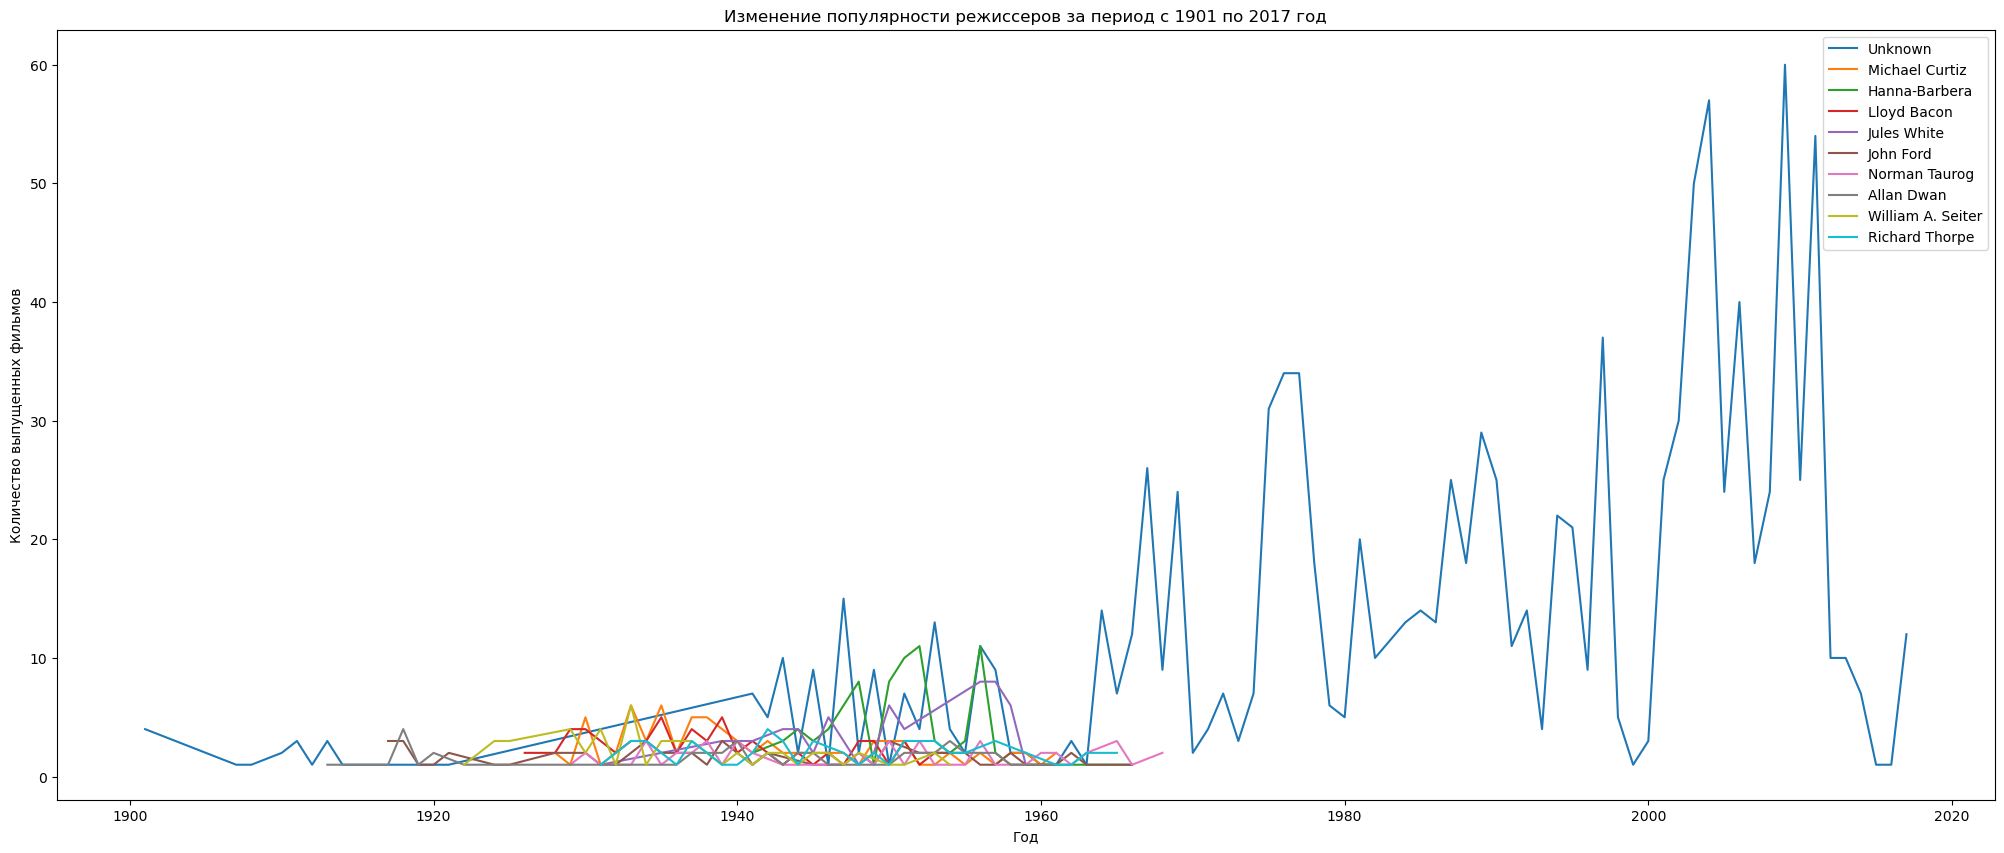

In [71]:
fig,ax = plt.subplots(1, 1, figsize = (25, 10))

for Director in Director_list:
    ax.plot(df_Director_gr[df_Director_gr.Director == Director].Year,df_Director_gr[df_Director_gr.Director == Director].Count_,label = Director)
ax.set_title('Изменение популярности режиссеров за период с 1901 по 2017 год')
ax.set_xlabel("Год")
ax.set_ylabel('Количество выпущенных фильмов')
ax.legend(loc = 'best')

## NTLK


In [ ]:
# Установка модуля Natural Language Toolkit. Для единообразия вынесено в начало.
#!pip install nltk

In [73]:
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [74]:
import re # вынести вверх
def remove(x):
    pattern = "['\n',@\'?\.$%_0-9]"
    x = [re.sub(pattern, '', i) for i in x]
    return x
    
# Обрабатываем столбец с описанием в дата фрейме
df['Plot'] = remove(df['Plot'])

In [75]:
df['compound'] = [vader.polarity_scores(x)['compound'] for x in df['Plot']]
df['neg'] = [vader.polarity_scores(x)['neg'] for x in df['Plot']]
df['neu'] = [vader.polarity_scores(x)['neu'] for x in df['Plot']]
df['pos'] = [vader.polarity_scores(x)['pos'] for x in df['Plot']]

In [76]:
df['sentiment'] = df['compound'].apply (lambda c: 'pos' if c >= 0 else 'neg' )

In [77]:
df

,Year,Title,Origin,Director,Cast,Genre,Wiki Page,Plot,Count_,compound,neg,neu,pos,sentiment
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,A bartender is working at a saloon serving dri...,1,-0.7269,0.073,0.927,0.000,neg
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,The moon painted with a smiling face hangs ove...,1,0.8934,0.024,0.821,0.155,pos
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,The film just over a minute long is composed o...,1,-0.4215,0.079,0.878,0.043,neg
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just seconds and consisting of two sh...,1,0.5647,0.033,0.904,0.063,pos
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,1,-0.2144,0.081,0.836,0.082,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,The film begins in just after World War I has...,1,-0.9969,0.162,0.773,0.066,neg
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,Two musicians Salih and Gürkan described the a...,1,0.3400,0.000,0.806,0.194,pos
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,Zafer a sailor living with his mother Döndü in...,1,0.8860,0.000,0.838,0.162,pos
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,1,0.3578,0.037,0.918,0.045,pos


<AxesSubplot:title={'center':'Общий анализ настроения по выборке фильмов'}, ylabel='Count_'>

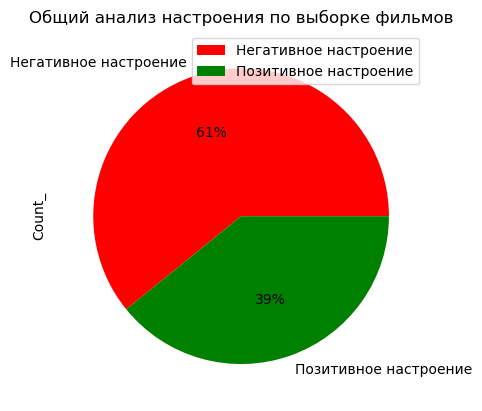

In [91]:
df.groupby(['sentiment']).sum().plot(kind = 'pie', 
                                          y = 'Count_',
                                          labels = ['Негативное настроение','Позитивное настроение'],
                                          autopct = '%1.0f%%', 
                                          colors = ['red', 'green'],                                                                                  
                                          title = 'Общий анализ настроения по выборке фильмов')

